In [3]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [4]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string) 

#### 1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features. Use the data from 2005. 

In [5]:
query = ''' SELECT
    f.title,
    f.rental_duration,
    f.rental_rate,
    f.length,
    f.rating,
    c.name AS ‘category’,
    r.rental_date
FROM
    film f
        INNER JOIN
    inventory i ON f.film_id = i.film_id
        INNER JOIN
    film_category f_c ON f_c.film_id = f.film_id
        INNER JOIN
    category c ON f_c.category_id = c.category_id
        RIGHT JOIN
    rental r ON r.inventory_id = i.inventory_id;'''

In [6]:
data = pd.read_sql_query(query, engine)
data

title  rental_duration  rental_rate  length rating  \
0       BLANKET BEVERLY                7         2.99     148      G   
1          FREAKY POCUS                7         2.99     126      R   
2         GRADUATE LORD                7         2.99     156      G   
3         LOVE SUICIDES                6         0.99     181      R   
4       IDOLS SNATCHERS                5         2.99      84  NC-17   
...                 ...              ...          ...     ...    ...   
16044  ACADEMY DINOSAUR                6         0.99      86     PG   
16045  ACADEMY DINOSAUR                6         0.99      86     PG   
16046  ACADEMY DINOSAUR                6         0.99      86     PG   
16047  ACADEMY DINOSAUR                6         0.99      86     PG   
16048  ACADEMY DINOSAUR                6         0.99      86     PG   

        ‘category’         rental_date  
0           Family 2005-05-24 22:53:30  
1            Music 2005-05-24 22:54:33  
2         Children 2005-05-24 23:03:39  
3           Horror 2005-05-24 23:04:41  
4         Children 2005-05-24 23:05:21  
...            ...                 ...  
16044  Documentary 2022-09-19 17:38:13  
16045  Documentary 2022-09-19 18:52:52  
16046  Documentary 2022-09-19 18:53:46  
16047  Documentary 2022-09-19 19:09:13  
16048  Documentary 2022-09-19 19:45:01  

[16049 rows x 7 columns]

#### 2. Create a query to get the list of films and a boolean indicating if it was rented last month (August 2005). This would be our target variable.

#### 3. Read the data into a Pandas dataframe.

In [7]:
data['rental_month']=pd.DatetimeIndex(data['rental_date']).month
data

title  rental_duration  rental_rate  length rating  \
0       BLANKET BEVERLY                7         2.99     148      G   
1          FREAKY POCUS                7         2.99     126      R   
2         GRADUATE LORD                7         2.99     156      G   
3         LOVE SUICIDES                6         0.99     181      R   
4       IDOLS SNATCHERS                5         2.99      84  NC-17   
...                 ...              ...          ...     ...    ...   
16044  ACADEMY DINOSAUR                6         0.99      86     PG   
16045  ACADEMY DINOSAUR                6         0.99      86     PG   
16046  ACADEMY DINOSAUR                6         0.99      86     PG   
16047  ACADEMY DINOSAUR                6         0.99      86     PG   
16048  ACADEMY DINOSAUR                6         0.99      86     PG   

        ‘category’         rental_date  rental_month  
0           Family 2005-05-24 22:53:30             5  
1            Music 2005-05-24 22:54:33             5  
2         Children 2005-05-24 23:03:39             5  
3           Horror 2005-05-24 23:04:41             5  
4         Children 2005-05-24 23:05:21             5  
...            ...                 ...           ...  
16044  Documentary 2022-09-19 17:38:13             9  
16045  Documentary 2022-09-19 18:52:52             9  
16046  Documentary 2022-09-19 18:53:46             9  
16047  Documentary 2022-09-19 19:09:13             9  
16048  Documentary 2022-09-19 19:45:01             9  

[16049 rows x 8 columns]

In [8]:
# working on my target (movies rented in may aka 1)
in_may = []
for number in data['rental_month']:
    if number == 5:
        in_may.append(1)
    else:
        in_may.append(0)
        
data['rented_may'] = in_may
data['rented_may'].value_counts()

0    14893
1     1156
Name: rented_may, dtype: int64

In [21]:
# dropping columns which I no longer need
data = data.drop(['rental_date','rental_month'], axis=1)
data

title  rental_duration  rental_rate  length rating  \
0       BLANKET BEVERLY                7         2.99     148      G   
1          FREAKY POCUS                7         2.99     126      R   
2         GRADUATE LORD                7         2.99     156      G   
3         LOVE SUICIDES                6         0.99     181      R   
4       IDOLS SNATCHERS                5         2.99      84  NC-17   
...                 ...              ...          ...     ...    ...   
16044  ACADEMY DINOSAUR                6         0.99      86     PG   
16045  ACADEMY DINOSAUR                6         0.99      86     PG   
16046  ACADEMY DINOSAUR                6         0.99      86     PG   
16047  ACADEMY DINOSAUR                6         0.99      86     PG   
16048  ACADEMY DINOSAUR                6         0.99      86     PG   

        ‘category’  rented_may  
0           Family           1  
1            Music           1  
2         Children           1  
3           Horror           1  
4         Children           1  
...            ...         ...  
16044  Documentary           0  
16045  Documentary           0  
16046  Documentary           0  
16047  Documentary           0  
16048  Documentary           0  

[16049 rows x 7 columns]

#### 4. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

In [8]:
# creating a new df with only movie rented in may

#data_may = new_data[new_data['rented_may']==1]
#data_may.head()
#data_may.shape

In [22]:
# no nan values
data.isna().sum() 

title              0
rental_duration    0
rental_rate        0
length             0
rating             0
‘category’         0
rented_may         0
dtype: int64

In [ ]:
data.drop_duplicates() 

In [23]:
data.shape

(16049, 7)

In [24]:
data.describe().T

count        mean        std    min    25%     50%     75%  \
rental_duration  16049.0    4.935822   1.401597   3.00   4.00    5.00    6.00   
rental_rate      16049.0    2.942022   1.649781   0.99   0.99    2.99    4.99   
length           16049.0  114.962054  40.099359  46.00  81.00  113.00  148.00   
rented_may       16049.0    0.072029   0.258545   0.00   0.00    0.00    0.00   

                    max  
rental_duration    7.00  
rental_rate        4.99  
length           185.00  
rented_may         1.00

In [25]:
data.dtypes


title               object
rental_duration      int64
rental_rate        float64
length               int64
rating              object
‘category’          object
rented_may           int64
dtype: object

In [26]:
data['rental_duration'].value_counts()

3    3412
6    3397
4    3251
5    3165
7    2824
Name: rental_duration, dtype: int64

In [27]:
data['rental_rate'].value_counts()

0.99    5657
4.99    5272
2.99    5120
Name: rental_rate, dtype: int64

In [28]:
data['rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3217
R        3181
G        2773
Name: rating, dtype: int64

In [29]:
data[‘category’].value_counts()

SyntaxError: invalid character '‘' (U+2018) (4124251994.py, line 1)

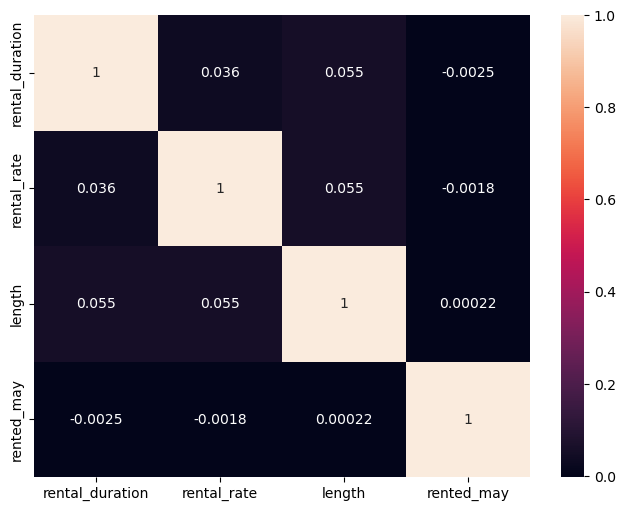

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# There is no correlation between the features. 

In [31]:
# making into category as i want to treat it as a categorical value 
data['rental_duration'] = data['rental_duration'].astype(object)
data['rental_rate'] = data['rental_rate'].astype(object)

### Need to X-y-split AND train-test-split BEFORE I apply transformations, then train transformation on training set only

In [32]:

# train-test-split before transformations, then train transformation on training set only
y = data['rented_may']
X = data.drop('rented_may', axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
data.dtypes # got no numerical anymore

title              object
rental_duration    object
rental_rate        object
length              int64
rating             object
‘category’         object
rented_may          int64
dtype: object

In [ ]:
#import numpy as np

#X_num = data.select_dtypes(include = np.number) # i might need this
# X_cat = data.select_dtypes(include = object)

In [35]:
# X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only

y = data['title']
X = data.drop('title', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [36]:
from sklearn.preprocessing import OneHotEncoder
# This encoder only will be run one time
onehotencoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train)


#### Create a logistic regression model to predict this variable from the cleaned data.

At this point the questining everything, whether the query is good or not, do we need to work with 16k rows and the duplicates in the df or only import from sql the movies which were rented in may? Or is it enough if I filter those movies with the boolean and drop the duplicates. 